# loan analyzing mini project
### the aim of this project is to understand whether a borrower will pay back the loan or not

#### importing and reading needed stuff

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [18]:
loanD = pd.read_excel('loandataset.xlsx')
loanD.head(5)
len(loanD.columns)

16

In [19]:
customerD = pd.read_csv('customer_data.csv' , sep=';')
customerD.head(5)

,id,first_name,last_name,email,gender,city,country
0,C1,Rafaelia,Constable,rconstable0@google.co.jp,Female,Kazanskoye,Russia
1,C2,Rayner,Langhor,rlanghor1@arstechnica.com,Male,Yauca,Peru
2,C3,Felike,Duchesne,fduchesne2@blog.com,Male,Monte Santo de Minas,Brazil
3,C4,Kelli,Winchcomb,kwinchcomb3@tuttocitta.it,Female,Červené Pečky,Czech Republic
4,C5,Timi,Butterley,tbutterley4@jalbum.net,Female,Lorino,Russia


#### merging data frames based on ID

In [20]:
merged_info = pd.merge(loanD, customerD, left_on= 'customerid', right_on='id' )
len(merged_info.columns)

23

#### cleaning data

In [21]:
merged_info.isnull().sum()
merged_info.dropna()

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,delinq.2yrs,pub.rec,not.fully.paid,id,first_name,last_name,email,gender,city,country
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.041670,...,0,0,0,C193,Yuma,Malecky,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.000000,...,0,0,0,C114,Steven,Thalmann,sthalmann35@bloglines.com,Male,Rio Meão,Portugal
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.000000,...,0,0,0,C920,Yetta,Cupitt,ycupittpj@etsy.com,Female,Muruni,Indonesia
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,...,1,0,0,C56,Mycah,Drohun,mdrohun1j@paypal.com,Male,Tendō,Japan
5,503,C503,1,credit_card,0.0832,160.57,10.985293,7.08,767,13319.041670,...,0,0,0,C503,Dorena,Keely,dkeelydy@alibaba.com,Female,Oued Lill,Tunisia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,20,C20,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,...,0,0,0,C20,Krissy,Chamberlayne,kchamberlaynej@dion.ne.jp,Bigender,Liufu,China
995,109,C109,1,all_other,0.1249,234.15,10.043249,5.01,662,1110.000000,...,0,0,0,C109,Christophorus,Mackrill,cmackrill30@nyu.edu,Male,Cha’anpu,China
996,141,C141,1,educational,0.1249,100.35,10.279181,12.77,662,1110.000000,...,1,0,1,C141,Quillan,Pinckney,qpinckney3w@msn.com,Male,Storozhevaya,Russia
997,66,C66,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,...,0,0,1,C66,Alyse,Kobpa,akobpa1t@trellian.com,Female,Cojata,Peru


In [22]:
merged_info.duplicated().sum()
merged_info.drop_duplicates()

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,delinq.2yrs,pub.rec,not.fully.paid,id,first_name,last_name,email,gender,city,country
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.041670,...,0,0,0,C193,Yuma,Malecky,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.000000,...,0,0,0,C114,Steven,Thalmann,sthalmann35@bloglines.com,Male,Rio Meão,Portugal
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.000000,...,0,0,0,C920,Yetta,Cupitt,ycupittpj@etsy.com,Female,Muruni,Indonesia
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,...,1,0,0,C56,Mycah,Drohun,mdrohun1j@paypal.com,Male,Tendō,Japan
4,93,C93,1,debt_consolidation,0.0870,383.87,11.918391,4.80,767,13349.958330,...,0,0,0,C93,Anita,Harcus,aharcus2k@jiathis.com,Female,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,20,C20,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,...,0,0,0,C20,Krissy,Chamberlayne,kchamberlaynej@dion.ne.jp,Bigender,Liufu,China
995,109,C109,1,all_other,0.1249,234.15,10.043249,5.01,662,1110.000000,...,0,0,0,C109,Christophorus,Mackrill,cmackrill30@nyu.edu,Male,Cha’anpu,China
996,141,C141,1,educational,0.1249,100.35,10.279181,12.77,662,1110.000000,...,1,0,1,C141,Quillan,Pinckney,qpinckney3w@msn.com,Male,Storozhevaya,Russia
997,66,C66,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,...,0,0,1,C66,Alyse,Kobpa,akobpa1t@trellian.com,Female,Cojata,Peru


#### creating a new col in merged_info Using categorizing function

In [23]:
def categorizing_purpose (purpose):
    if purpose in ['credit_card', 'debt_consolidation']:
        return 'financial'
    elif purpose in ['educational', 'small_business']:
        return 'educational/business'
    else:
        return 'others'
    
categorizing_purpose ('credit_card')

merged_info['purpose_category'] = merged_info['purpose'].apply(categorizing_purpose)

#### categorizing risk
#### if: (DTI ration > 20 & deling.2year > 2  & revol.uti >60) then borrower is highly risky

In [25]:
def risk_evaluator ( row ):
    if row['dti'] > 20 and row['delinq.2yrs'] > 2 and row['revol.util']>60 :
        return 'risky borrower'
    else:
        return "not risky borrower"
    
merged_info['risk'] = merged_info.apply(risk_evaluator, axis=1)
# merged_info.columns

#### categorizing FICO score

In [28]:
def FICO_categorizer ( fico_score ):
    if fico_score >= 800 and fico_score <=850:
        return "perfect"
    elif fico_score >= 740 and fico_score <800:
        return "very good"
    elif fico_score >= 670 and fico_score <740:
        return "good"
    elif fico_score >= 580 and fico_score <670:
        return "moderate"
    else:
        return 'miserable'

merged_info['FICO_score'] = merged_info['fico'].apply(FICO_categorizer)

In [32]:
def identify (row):

    # avg inquiries in the last 6 month in the primary DF
    avg_inquiries = merged_info['inq.last.6mths'].mean()

    # public recors in in the primary DF
    avg_derug = merged_info['pub.rec'].mean()

    if row['inq.last.6mths'] > avg_inquiries and row['pub.rec'] > avg_derug:
        return True
    else:
        return False
    
merged_info['pub_rec&inq_last6'] = merged_info.apply(identify, axis=1)

#### visualization 

In [33]:
sns.set_style('darkgrid')

C:\Users\mgs\AppData\Local\Temp\ipykernel_10072\1666425874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purpose', data=merged_info, palette='dark')


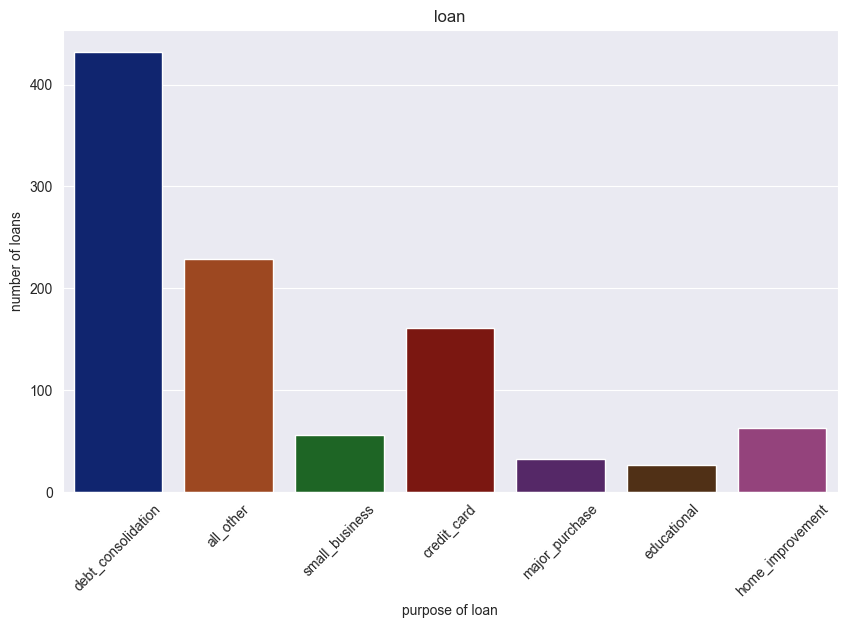

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', data=merged_info, palette='dark')
plt.title('loan')
plt.xlabel('purpose of loan')
plt.ylabel('number of loans')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'debt to income ration VS annual income ')

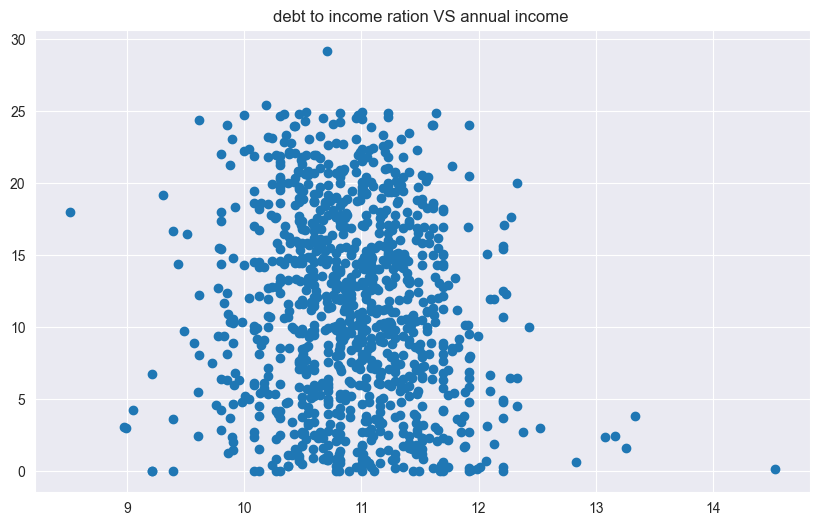

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(x='log.annual.inc', y='dti' , data=merged_info)
plt.title('debt to income ration VS annual income ')

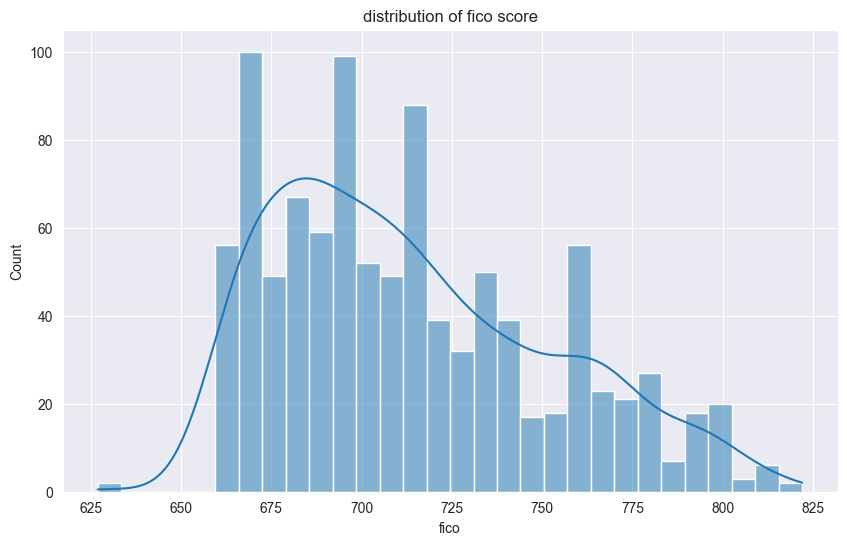

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(   merged_info['fico'], bins=30, kde = True)
plt.title('distribution of fico score')
plt.show()